# Procesamiento y exploración del dataset completo

In [ ]:
import pandas as pd

df = pd.read_csv("datos_merge_date_euclidea_11_09.csv")

# Creación de variable campaign

In [ ]:
import pandas as pd

df['DATE'] = pd.to_datetime(df['DATE'])

df = df.sort_values('DATE').reset_index(drop=True)


df['diff_days'] = df['DATE'].diff().dt.days.fillna(0)

# Diferencia de dias > 5
df['campaign'] = (df['diff_days'] > 5).cumsum() + 1

df.drop(columns='diff_days', inplace=True)


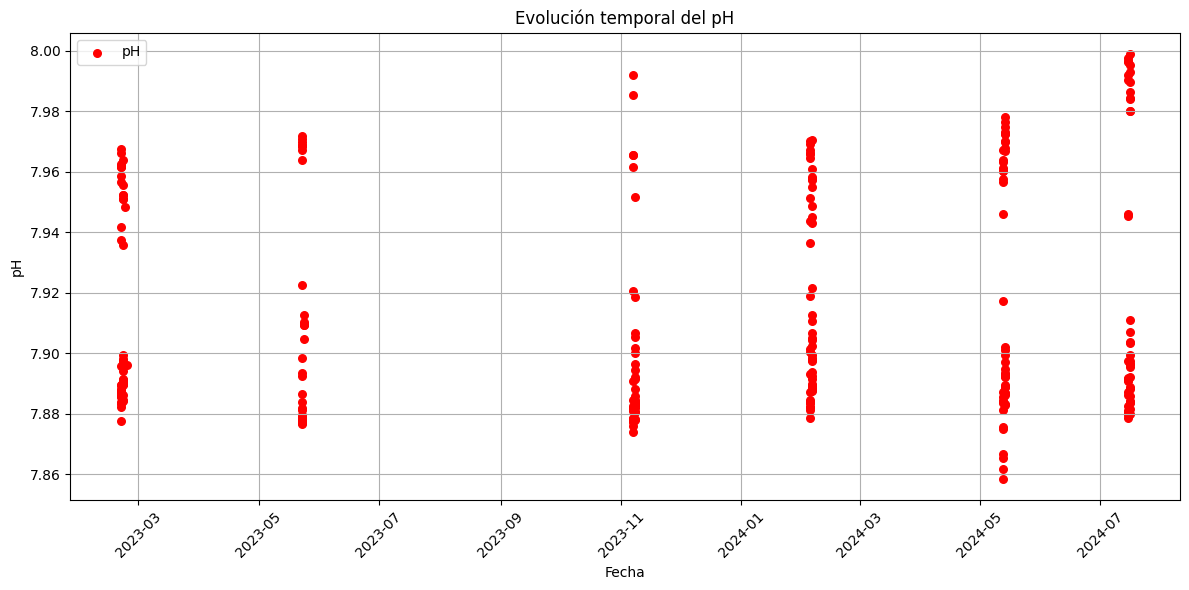

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.scatter(df['DATE'], df['pH'], color='r', s=30, label='pH')
plt.title('Evolución temporal del pH')
plt.xlabel('Fecha')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

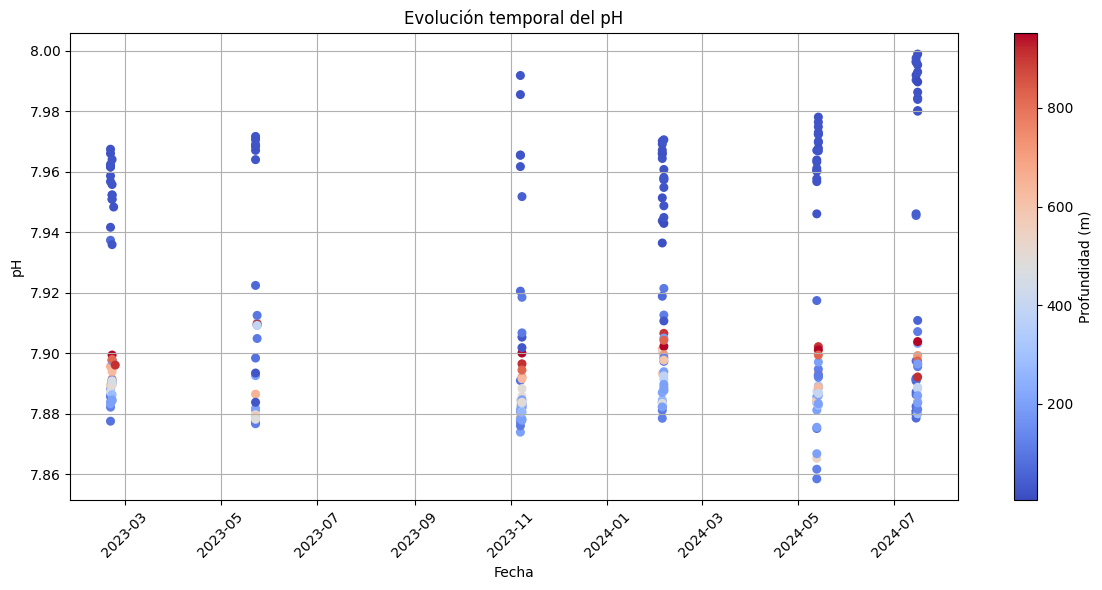

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['DATE'], df['pH'],
                      c=df['DEPTH'],            # color por profundidad
                      cmap='coolwarm',           # mapa de color (puedes probar 'plasma', 'coolwarm', etc.)
                      s=30)

plt.title('Evolución temporal del pH')
plt.xlabel('Fecha')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

cbar = plt.colorbar(scatter)
cbar.set_label('Profundidad (m)')

plt.show()


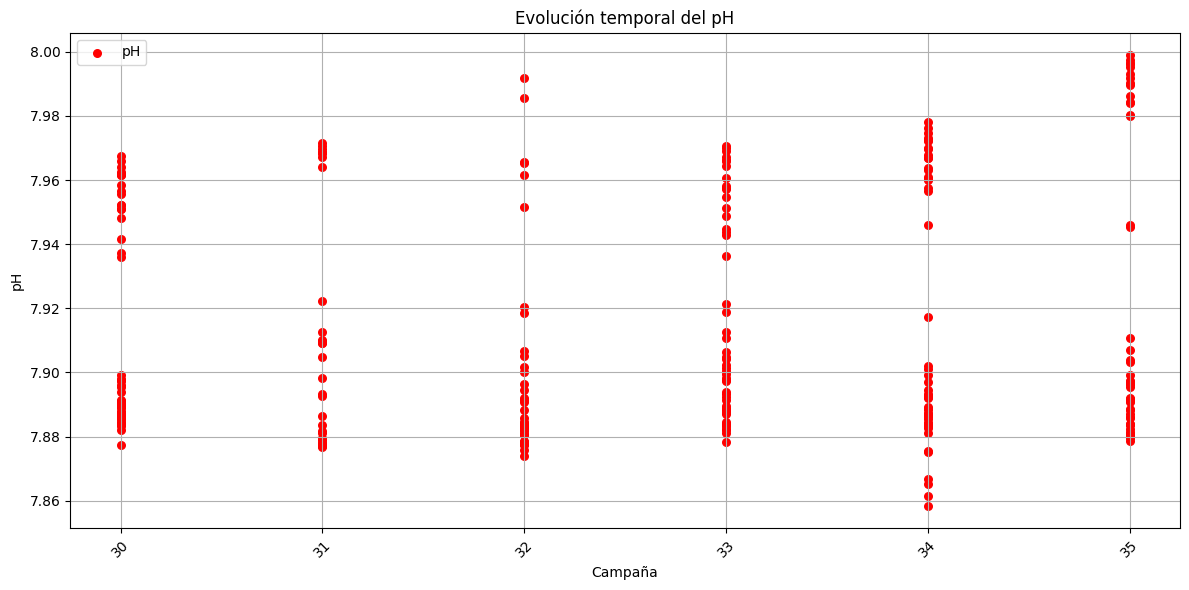

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.scatter(df['campaign'], df['pH'], color='r', s=30, label='pH')
plt.title('Evolución temporal del pH')
plt.xlabel('Campaña')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Quitar variables SDPAR, Spar, Par, DPAR y variables derivadas del merge de datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166314 entries, 0 to 166313
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   LAT            166314 non-null  float64       
 1   LON            166314 non-null  float64       
 2   DEPTH          166314 non-null  float64       
 3   WTR_PRE        166314 non-null  float64       
 4   WTR_TEM_01     166314 non-null  float64       
 5   DPAR           163115 non-null  float64       
 6   CHLO           166314 non-null  float64       
 7   TURB           166314 non-null  float64       
 8   SDPAR          163021 non-null  float64       
 9   OXI_CON        166314 non-null  float64       
 10  DATE           166314 non-null  datetime64[ns]
 11  COND           166314 non-null  float64       
 12  SALT           166314 non-null  float64       
 13  pH             269 non-null     float64       
 14  pH Accuracy    269 non-null     float64       
 15  

In [ ]:
df[['SDPAR', 'Spar', 'DPAR']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166314 entries, 0 to 166313
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   SDPAR   163021 non-null  float64
 1   Spar    323 non-null     float64
 2   DPAR    163115 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [ ]:
df[['SDPAR', 'Spar', 'DPAR']].describe()

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,SDPAR,Spar,DPAR
count,1.630210e+05,3.230000e+02,163115.000000
mean,2.719152e+298,5.279073e+13,752.495901
std,inf,3.621252e+13,2617.822977
min,-7.133570e+288,1.146500e+11,-28.760000
25%,8.100800e+02,2.030450e+13,0.005840
50%,1.035700e+13,5.154000e+13,0.005840
75%,5.293200e+13,7.677000e+13,0.372955
max,4.432789e+303,1.301400e+14,9999.000000


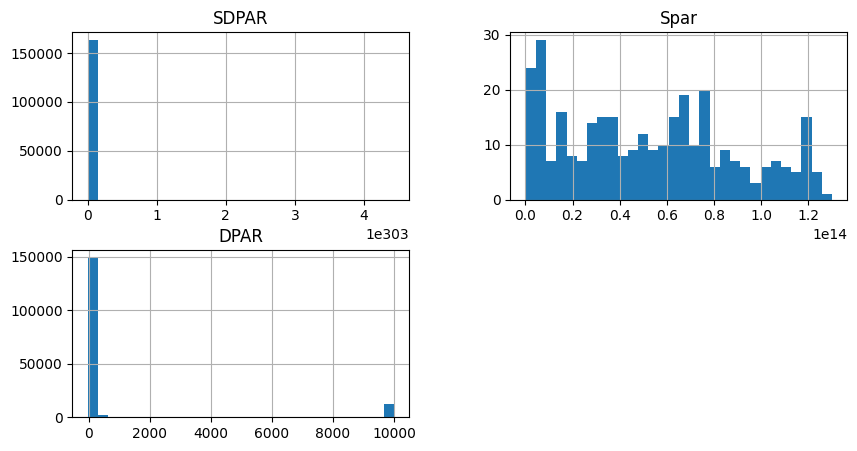

In [ ]:
import matplotlib.pyplot as plt

df[['SDPAR', 'Spar', 'DPAR']].hist(bins=30, figsize=(10,5))
plt.show()

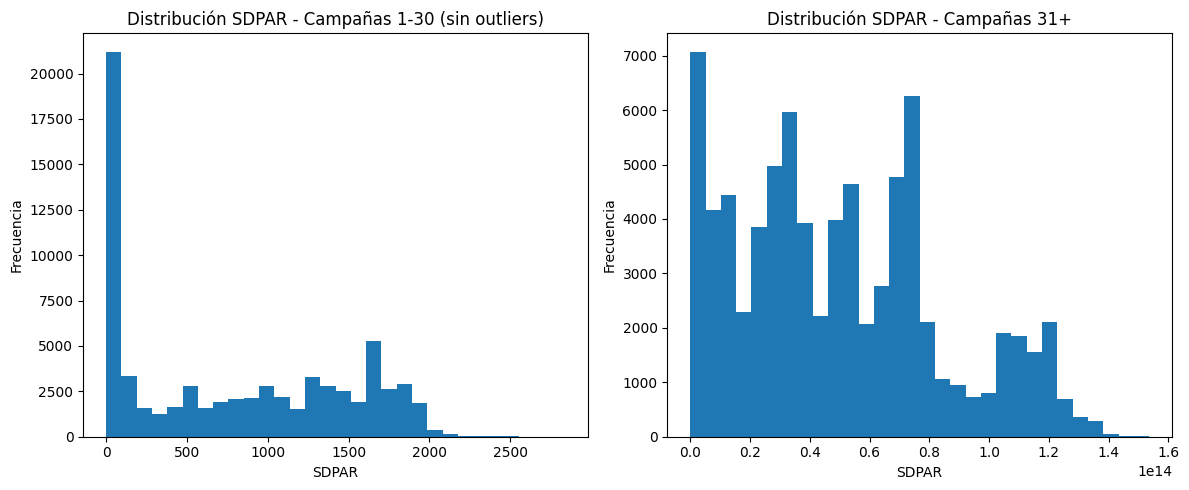

In [ ]:
import matplotlib.pyplot as plt

# Filtrar por rangos de campaña en df
grupo_1 = df[(df['campaign'] >= 1) & (df['campaign'] < 29)]

# Calcular Q1, Q3 e IQR
Q1 = grupo_1['SDPAR'].quantile(0.25)
Q3 = grupo_1['SDPAR'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar grupo 1 sin outliers
grupo_1_sin_outliers = grupo_1[(grupo_1['SDPAR'] >= limite_inferior) & (grupo_1['SDPAR'] <= limite_superior)]

import matplotlib.pyplot as plt

grupo_2 = df[df['campaign'] >= 30]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(grupo_1_sin_outliers['SDPAR'], bins=30)
plt.title('Distribución SDPAR - Campañas 1-30 (sin outliers)')
plt.xlabel('SDPAR')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(grupo_2['SDPAR'], bins=30)
plt.title('Distribución SDPAR - Campañas 31+')
plt.xlabel('SDPAR')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



In [ ]:

df.drop(columns=['SDPAR', 'Spar', 'DPAR'], inplace=True)
# Eliminar columnas que terminan en '_ph'
df = df.drop(columns=[col for col in df.columns if col.endswith('_ph')])


# Exploratorio de valores anómalos

In [ ]:
import pandas as pd

print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166314 entries, 0 to 166313
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   LAT           166314 non-null  float64       
 1   LON           166314 non-null  float64       
 2   DEPTH         166314 non-null  float64       
 3   WTR_PRE       166314 non-null  float64       
 4   WTR_TEM_01    166314 non-null  float64       
 5   CHLO          166314 non-null  float64       
 6   TURB          166314 non-null  float64       
 7   OXI_CON       166314 non-null  float64       
 8   DATE          166314 non-null  datetime64[ns]
 9   COND          166314 non-null  float64       
 10  SALT          166314 non-null  float64       
 11  pH            269 non-null     float64       
 12  pH Accuracy   269 non-null     float64       
 13  pH Precision  269 non-null     float64       
 14  campaign      166314 non-null  int64         
dtypes: datetime64[ns]

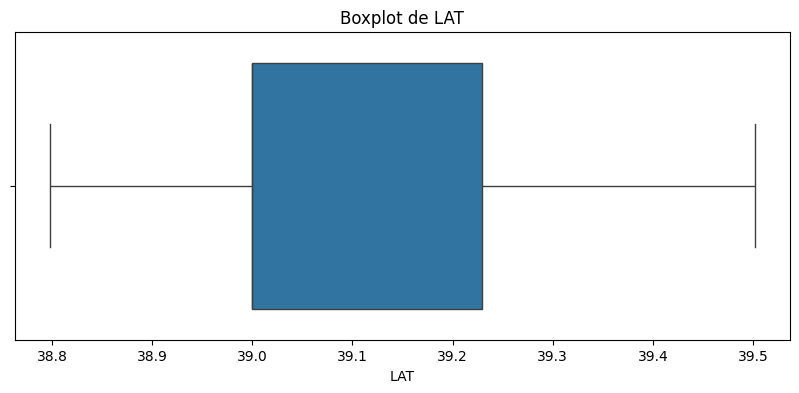

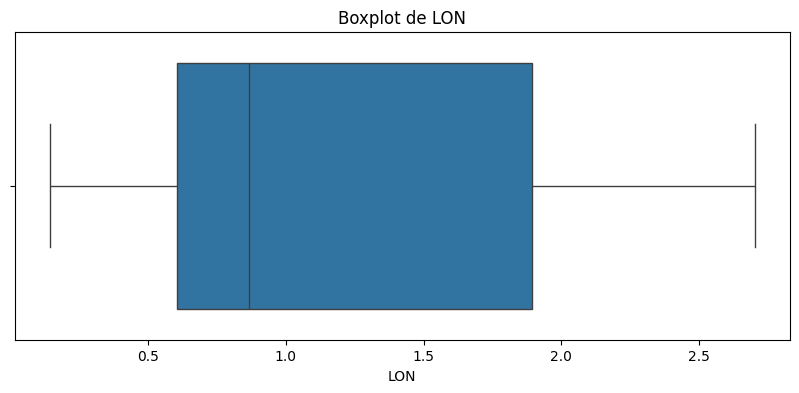

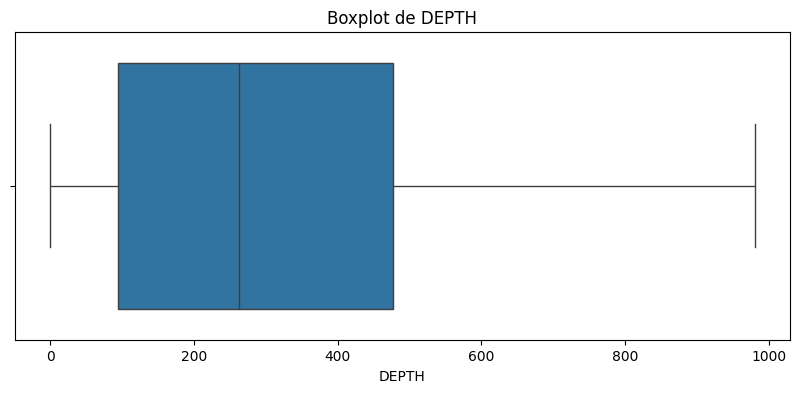

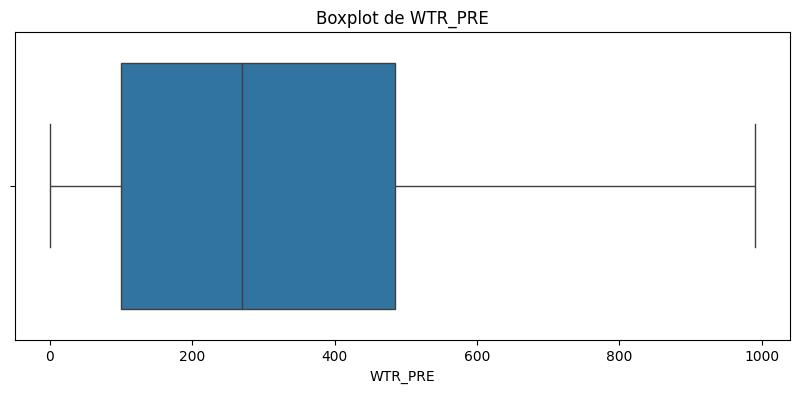

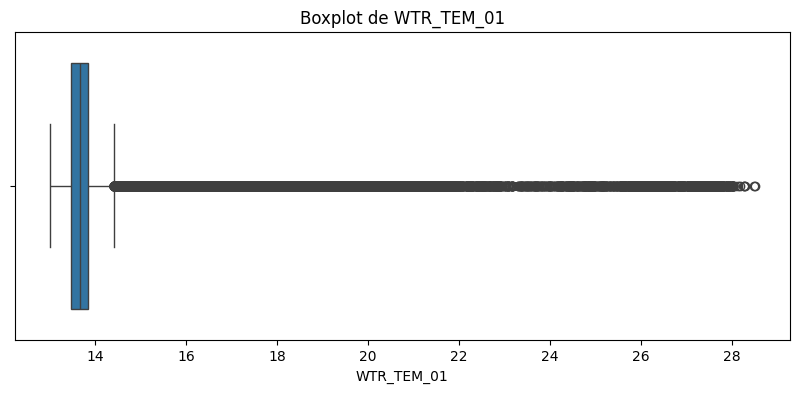

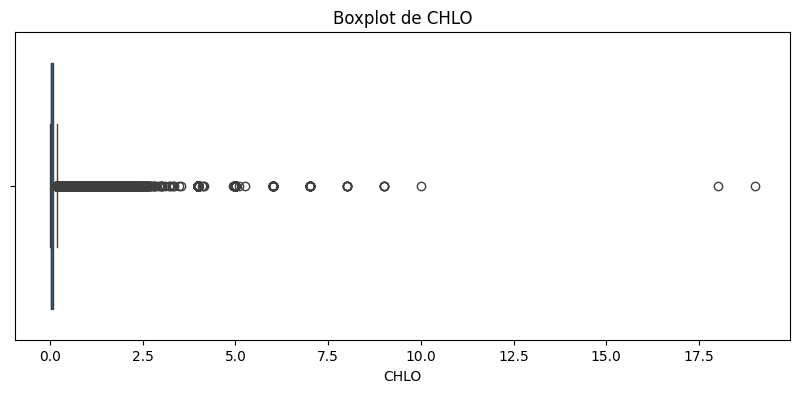

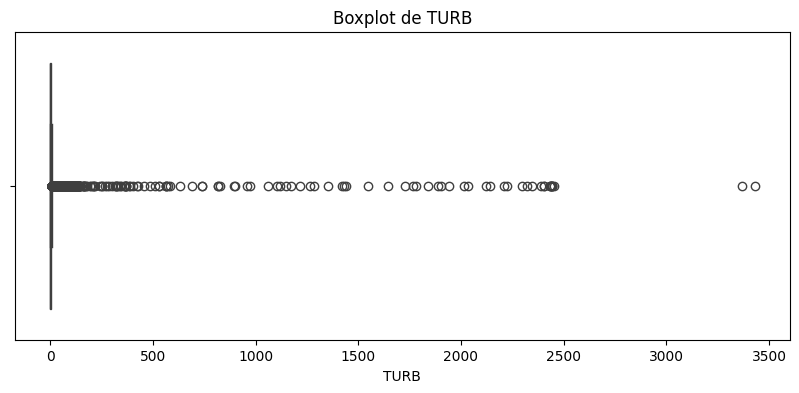

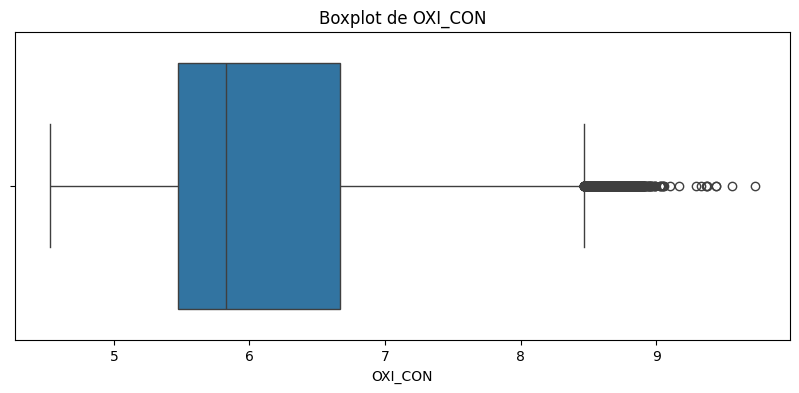

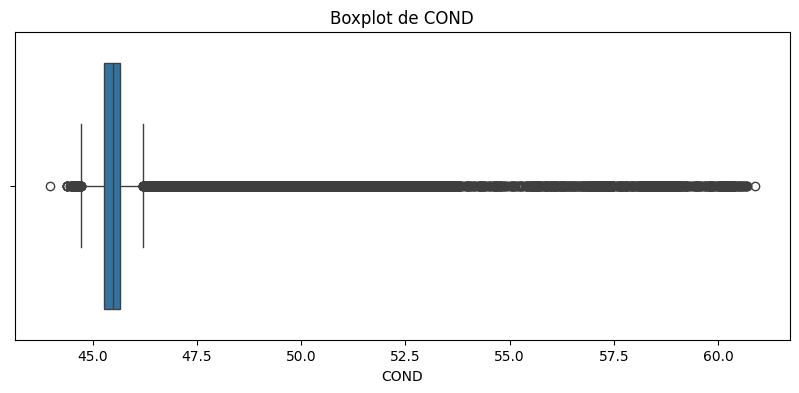

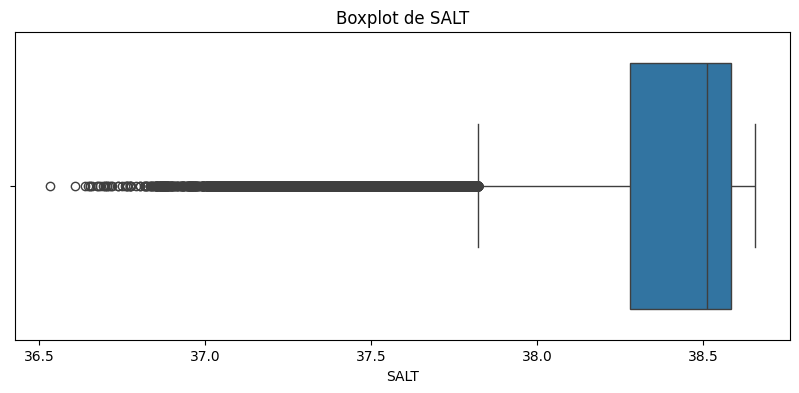

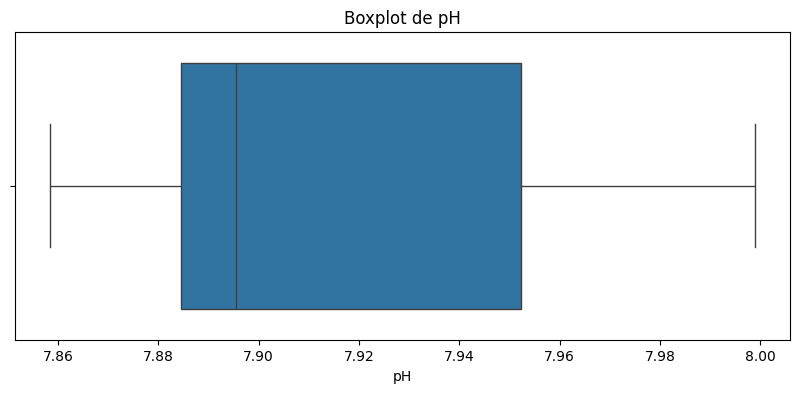

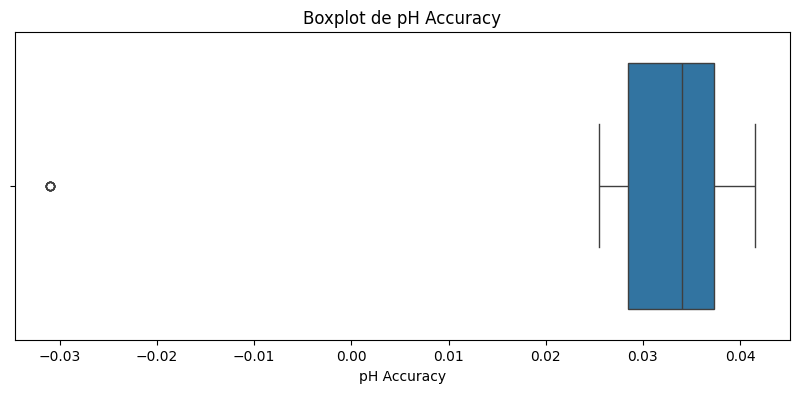

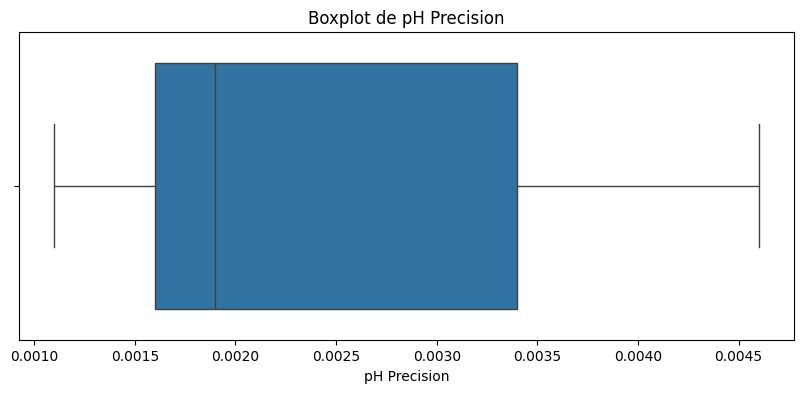

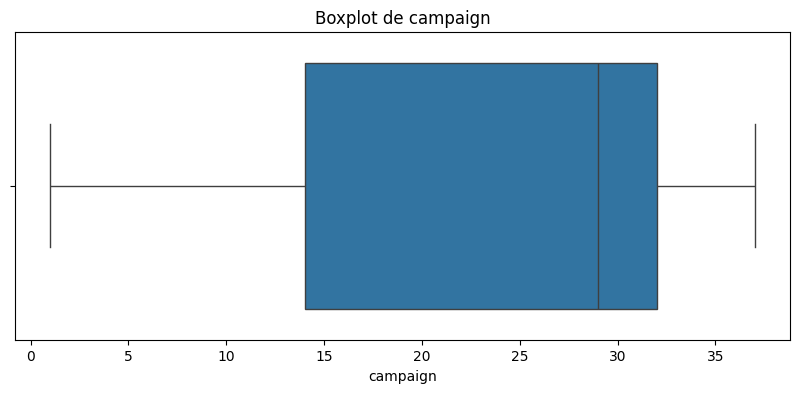

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in cols_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


## Isolation forest para deteccion de anomalias

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_para_modelo = [
    'LAT', 'LON', 'DEPTH', 'WTR_PRE', 'WTR_TEM_01',
   'CHLO', 'OXI_CON', 'SALT'
]


df_filtrado = df[cols_para_modelo].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

In [ ]:
from sklearn.ensemble import IsolationForest


iso_forest = IsolationForest(contamination=0.01, random_state=32)
df_filtrado['anomaly_iso'] = iso_forest.fit_predict(X_scaled)

# Etiquetas: -1 = anomalía, 1 = normal
print(df_filtrado['anomaly_iso'].value_counts())


anomaly_iso
 1    164650
-1      1664
Name: count, dtype: int64


In [ ]:
df.loc[df_filtrado.index, 'anomaly_iso'] = df_filtrado['anomaly_iso']


In [ ]:

#  anomalías por campaña
anomalies_by_campaign = df[df['anomaly_iso'] == -1]['campaign'].value_counts().sort_index()


total_by_campaign = df['campaign'].value_counts().sort_index()

# porcentaje  por campaña
percent_anomalies = (anomalies_by_campaign / total_by_campaign) * 100


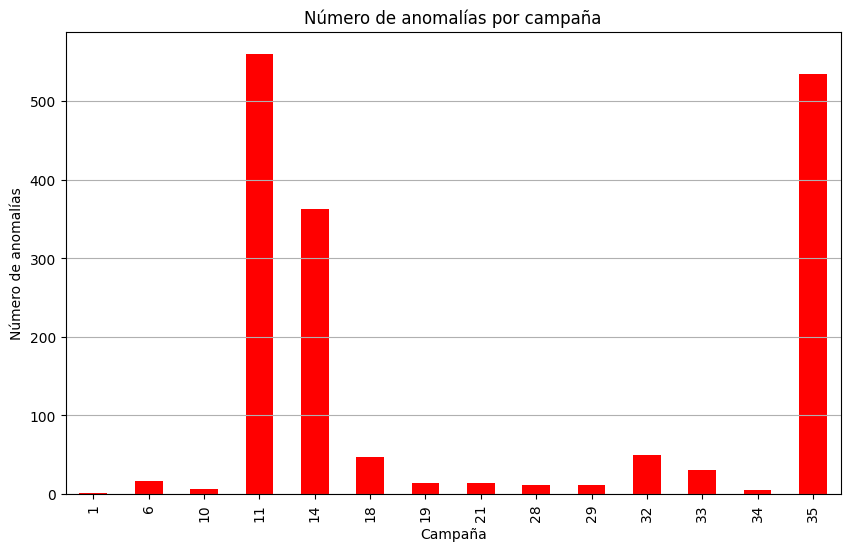

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
anomalies_by_campaign.plot(kind='bar', color='red')
plt.title('Número de anomalías por campaña')
plt.xlabel('Campaña')
plt.ylabel('Número de anomalías')
plt.grid(axis='y')
plt.show()


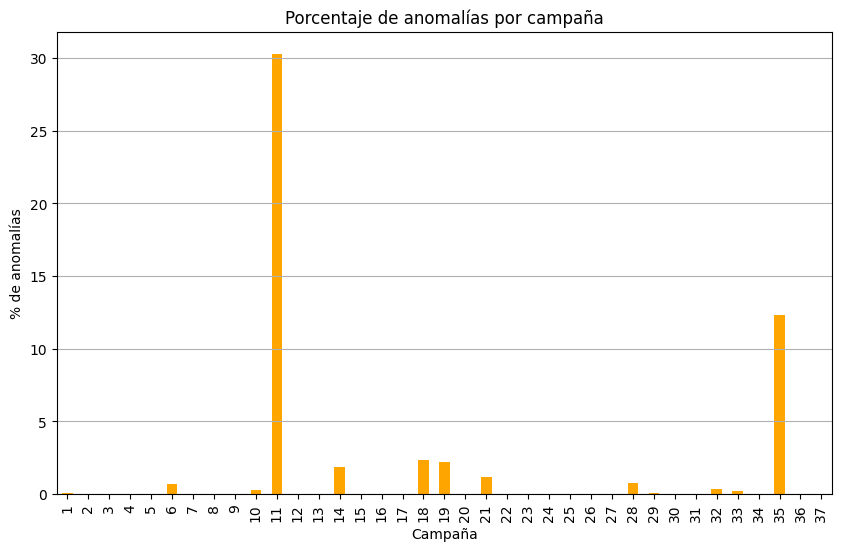

In [ ]:
plt.figure(figsize=(10, 6))
percent_anomalies.plot(kind='bar', color='orange')
plt.title('Porcentaje de anomalías por campaña')
plt.xlabel('Campaña')
plt.ylabel('% de anomalías')
plt.grid(axis='y')
plt.show()


In [ ]:
# Filtrar anomalías
anomalias = df[df['anomaly_iso'] == -1]

# Filtrar con datos de pH válidos
anomalias_con_ph = anomalias[anomalias['pH'].notna()]


print(f"Total de anomalías: {len(anomalias)}")
print(f"Anomalías con pH válido: {len(anomalias_con_ph)}")


Total de anomalías: 1664
Anomalías con pH válido: 1


In [ ]:
# conservar todo excepto anomalías SIN datos de pH
df_limpio = df[~((df['anomaly_iso'] == -1) & (df['pH'].isna()))]


print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar anomalías sin pH: {len(df_limpio)}")


Filas originales: 166314
Filas después de eliminar anomalías sin pH: 164651


In [ ]:
df_limpio = df_limpio[df_limpio['COND'] >= 3]


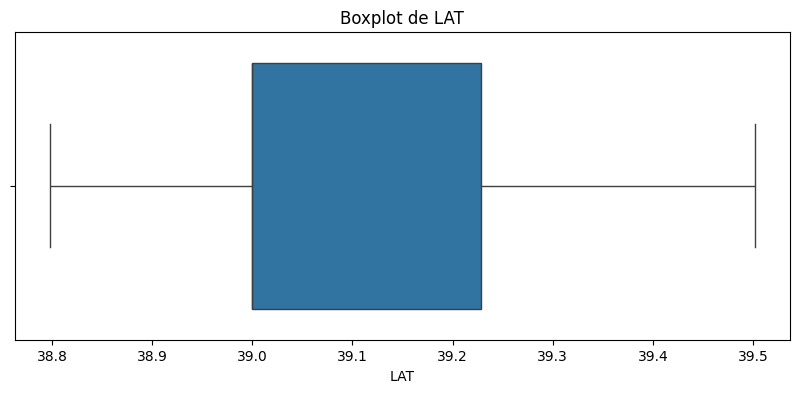

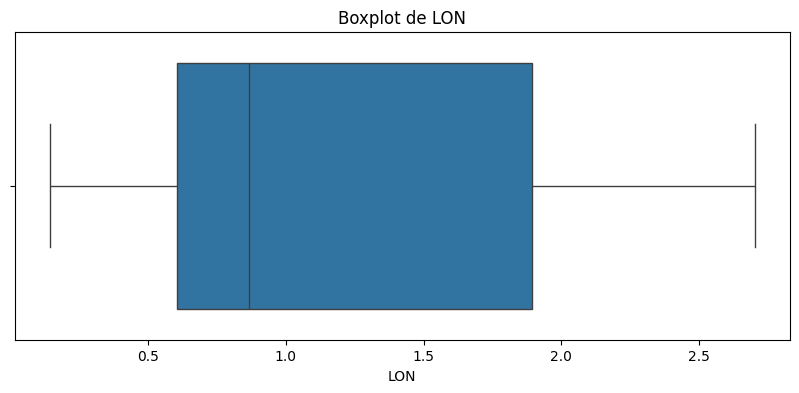

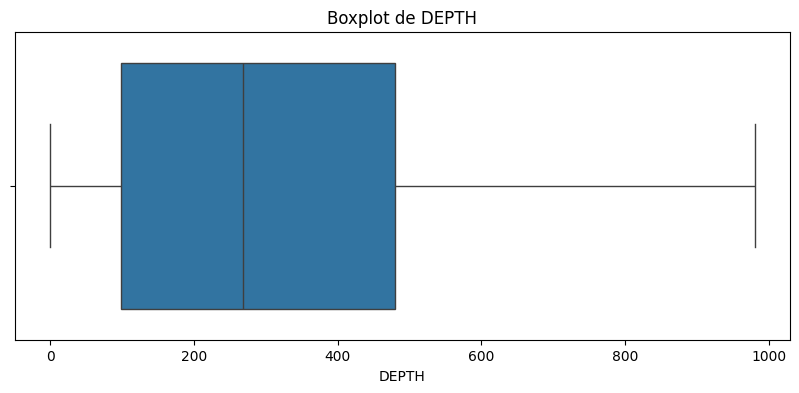

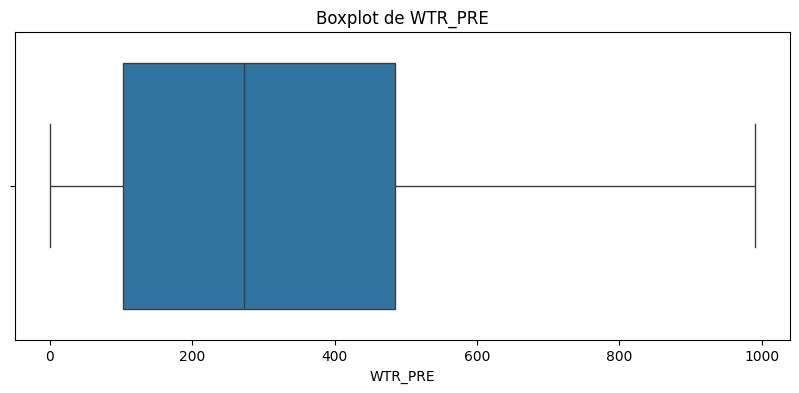

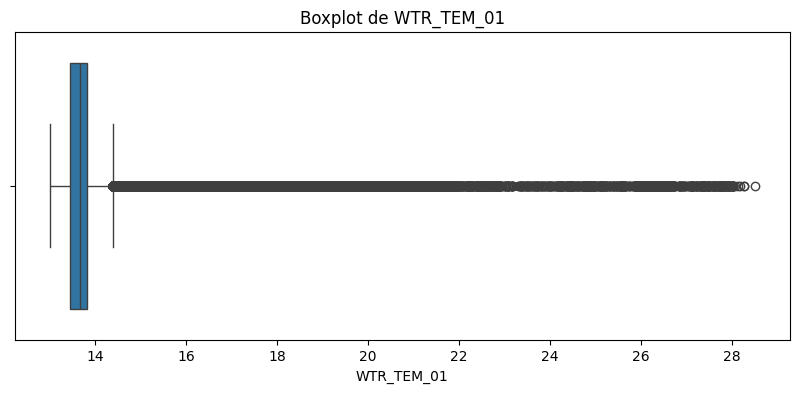

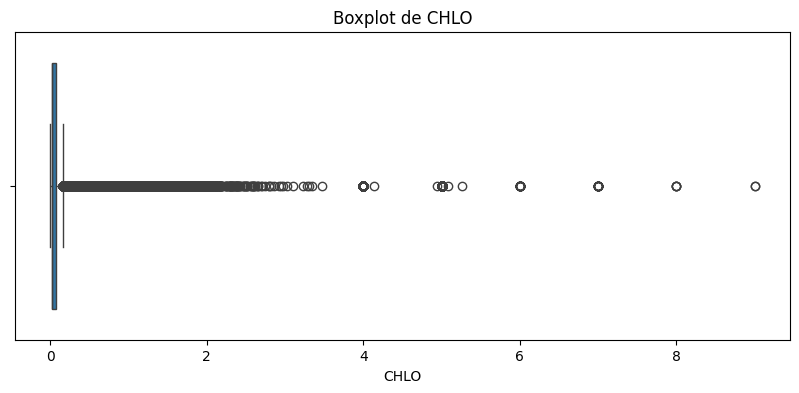

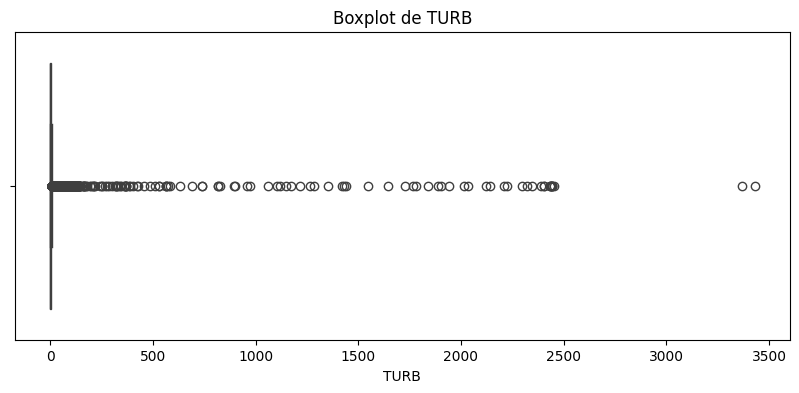

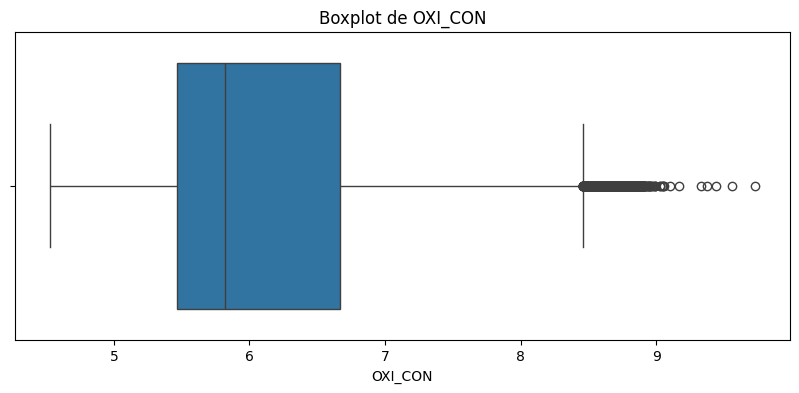

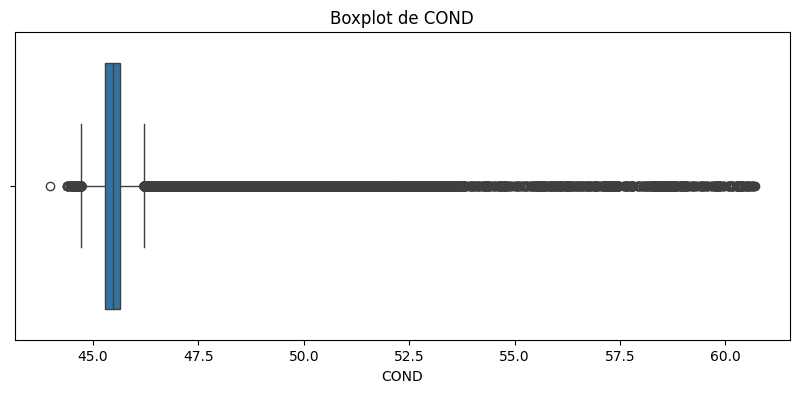

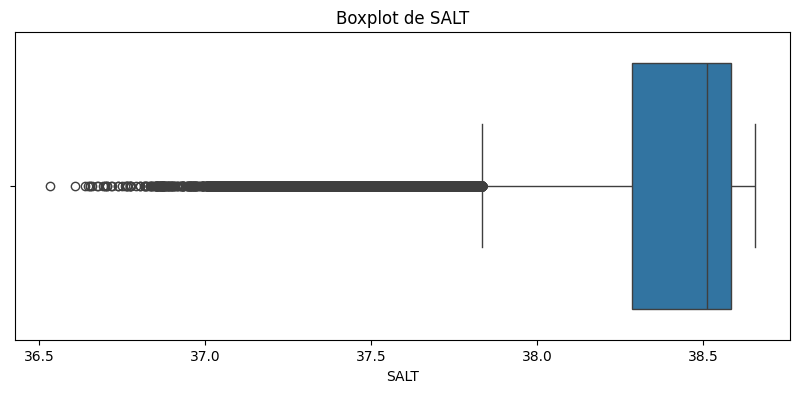

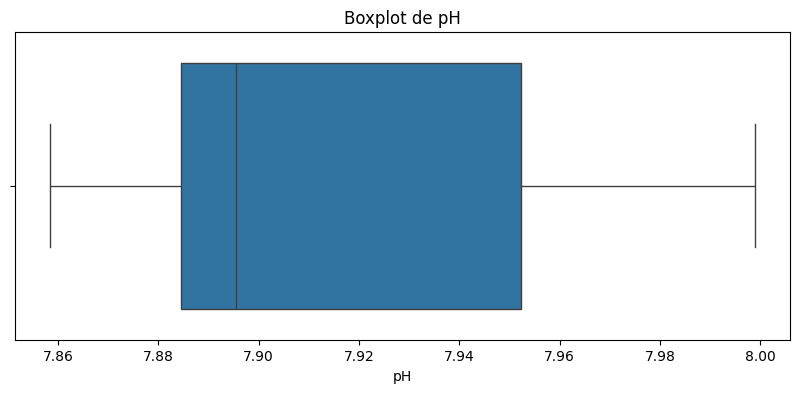

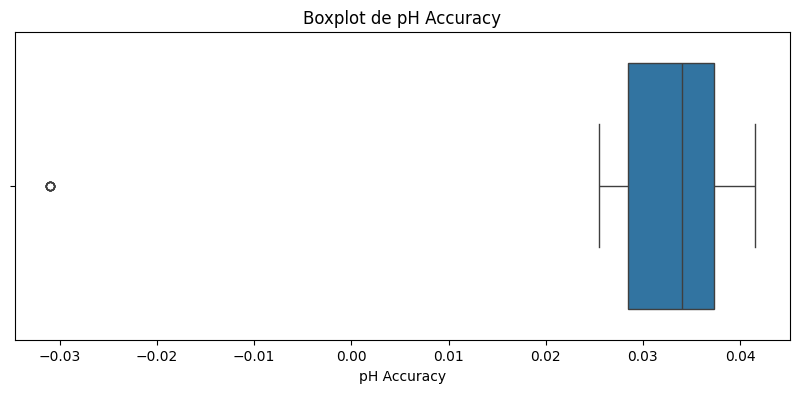

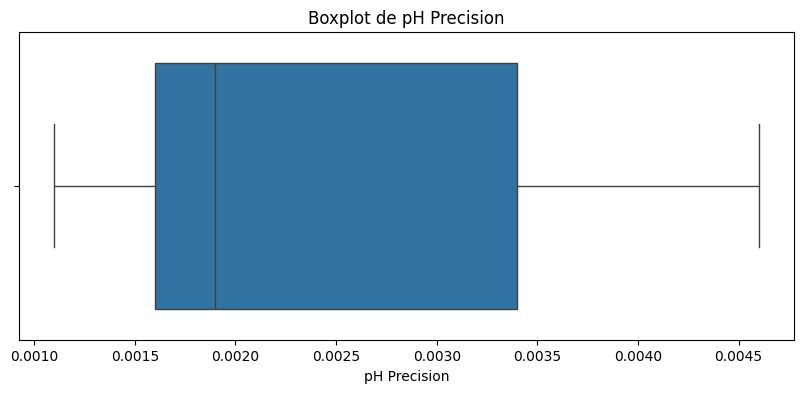

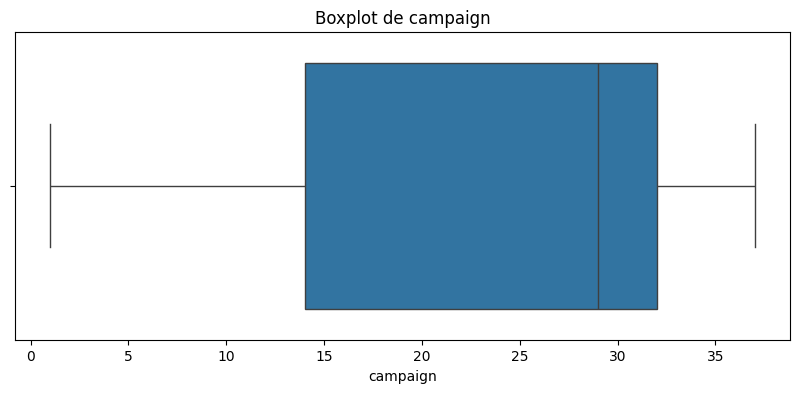

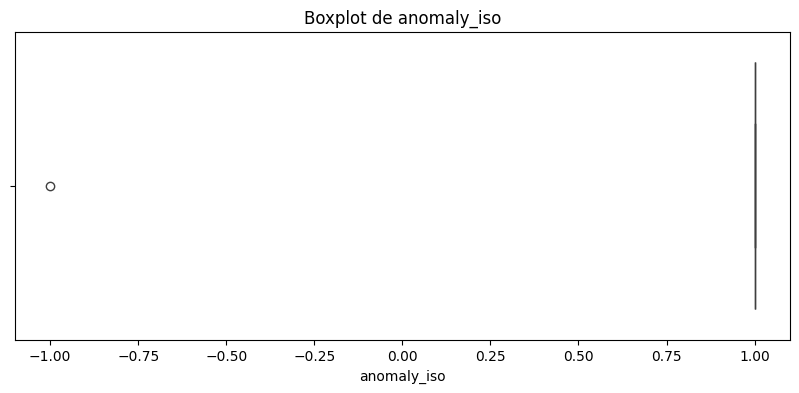

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cols_numericas = df_limpio.select_dtypes(include=['float64', 'int64']).columns.tolist()


for col in cols_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_limpio[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

# Guardar csv

In [ ]:
df_limpio.to_csv('clean_data_merge.csv', index=False)

# Creación de variables temporales

In [ ]:
import pandas as pd

df = pd.read_csv("clean_data_merge.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164651 entries, 0 to 164650
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LAT           164651 non-null  float64
 1   LON           164651 non-null  float64
 2   DEPTH         164651 non-null  float64
 3   WTR_PRE       164651 non-null  float64
 4   WTR_TEM_01    164651 non-null  float64
 5   CHLO          164651 non-null  float64
 6   TURB          164651 non-null  float64
 7   OXI_CON       164651 non-null  float64
 8   DATE          164651 non-null  object 
 9   COND          164651 non-null  float64
 10  SALT          164651 non-null  float64
 11  pH            269 non-null     float64
 12  pH Accuracy   269 non-null     float64
 13  pH Precision  269 non-null     float64
 14  campaign      164651 non-null  int64  
 15  anomaly_iso   164651 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 20.1+ MB


In [ ]:
df = df.dropna(subset=['SALT']) # Eliminar un valor na de salinidad

In [ ]:
import pandas as pd

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Asignar estación del año
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    elif month in [9, 10, 11]:
        return 4  # Autumn


df['season'] = df['DATE'].dt.month.map(get_season)

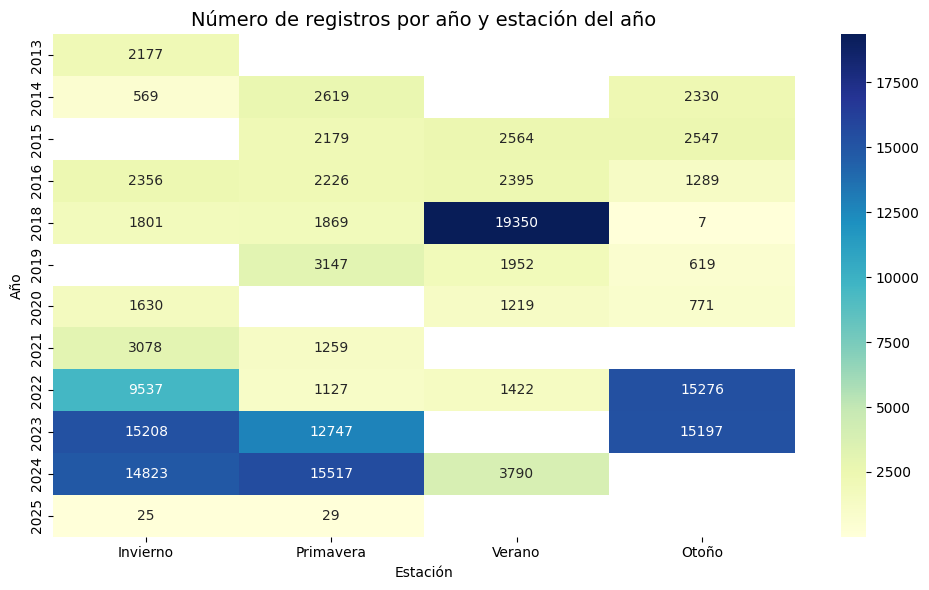

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que DATE es tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.dropna(subset=['DATE'])

# Crear columna de año
df['year'] = df['DATE'].dt.year

# Crear nombres de estaciones
season_names = {1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'}
df['season_name'] = df['season'].map(season_names)

# Crear tabla dinámica (número de registros por año y estación)
season_pivot = df.pivot_table(index='year', columns='season_name', values='SALT', aggfunc='count')

# Ordenar columnas por estación
season_pivot = season_pivot[['Invierno', 'Primavera', 'Verano', 'Otoño']]

# Visualización tipo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(season_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Número de registros por año y estación del año', fontsize=14)
plt.xlabel('Estación')
plt.ylabel('Año')
plt.tight_layout()
plt.show()



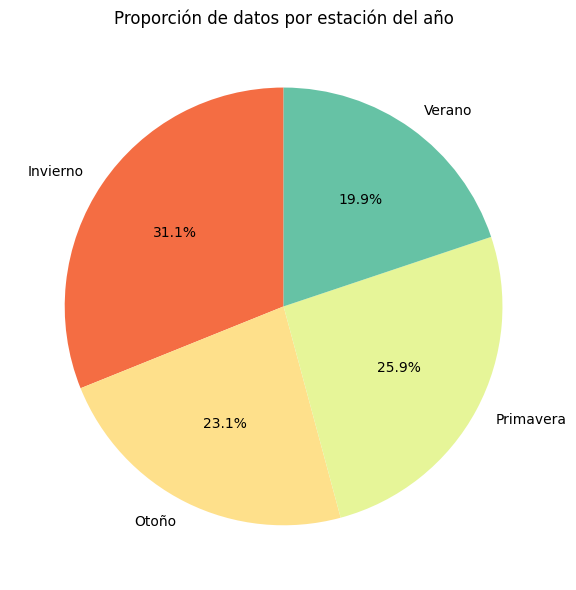

In [ ]:
season_counts = df['season_name'].value_counts().sort_index()
colors = sns.color_palette('Spectral', len(season_counts))

plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Proporción de datos por estación del año')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164651 entries, 0 to 164650
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   LAT           164651 non-null  float64       
 1   LON           164651 non-null  float64       
 2   DEPTH         164651 non-null  float64       
 3   WTR_PRE       164651 non-null  float64       
 4   WTR_TEM_01    164651 non-null  float64       
 5   CHLO          164651 non-null  float64       
 6   TURB          164651 non-null  float64       
 7   OXI_CON       164651 non-null  float64       
 8   DATE          164651 non-null  datetime64[ns]
 9   COND          164651 non-null  float64       
 10  SALT          164651 non-null  float64       
 11  pH            269 non-null     float64       
 12  pH Accuracy   269 non-null     float64       
 13  pH Precision  269 non-null     float64       
 14  campaign      164651 non-null  int64         
 15  anomaly_iso   164

In [ ]:
import pandas as pd


df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['year'] = df['DATE'].dt.year


df = df.sort_values('DATE').reset_index(drop=True)

df['DATE_CLEAN'] = df['DATE']

# Fecha de referencia del grupo
current_date = df['DATE'].iloc[0]

for i in range(1, len(df)):
    delta_days = (df['DATE'].iloc[i] - current_date).days
    if delta_days <= 5:  # Si la diferencia es de 1-4 días
        df.at[i, 'DATE_CLEAN'] = current_date
    else:
        current_date = df['DATE'].iloc[i]  # Nueva fecha de referencia

df['year_decimal'] = df['DATE_CLEAN'].dt.year + \
                              (df['DATE_CLEAN'].dt.dayofyear - 1) / 365.25

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])


df['day_of_year'] = df['DATE'].dt.dayofyear

In [ ]:
import numpy as np
df['sin_doy'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['cos_doy'] = np.cos(2 * np.pi * df['day_of_year'] / 365)


In [ ]:
cols = ['LAT', 'LON', 'DEPTH', 'WTR_PRE', 'WTR_TEM_01', 'CHLO', 'TURB',
        'OXI_CON', 'DATE', 'COND', 'SALT', 'pH', 'campaign', 'season']

summary_cols = df[cols]
summary_min_max = summary_cols.describe().loc[['min', 'max']].round(2)
summary_min_max



,LAT,LON,DEPTH,WTR_PRE,WTR_TEM_01,CHLO,TURB,OXI_CON,DATE,COND,SALT,pH,campaign,season
min,38.8,0.14,0.0,0.5,13.01,0.0,0.00,4.53,2013-12-02 00:00:00,43.98,36.53,7.86,1.0,1.0
max,39.5,2.70,980.0,990.0,28.50,9.0,3429.49,9.73,2025-05-20 00:00:00,60.70,38.66,8.00,37.0,4.0


In [ ]:
df.to_csv('clean_data_merge_complete_11_09.csv', index=False)

# Correlaciones entre variables

In [ ]:
import pandas as pd
df = pd.read_csv("clean_data_merge_complete_11_09.csv")

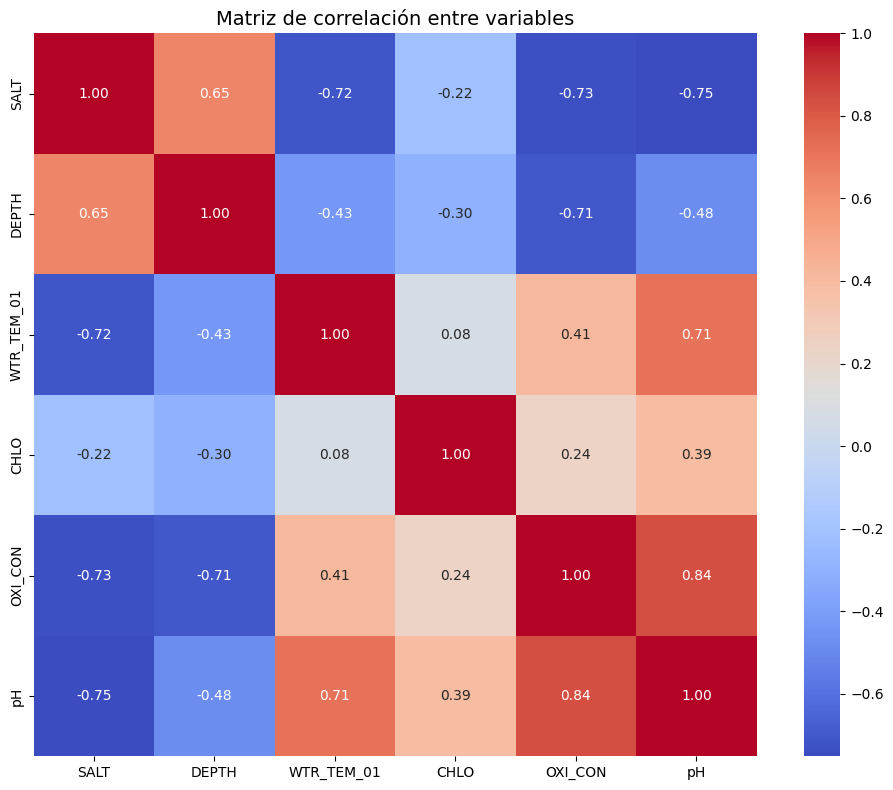

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['SALT', 'DEPTH', 'WTR_TEM_01', 'CHLO', 'OXI_CON', 'pH']
datos_numericos = df[variables]


matriz_correlacion = datos_numericos.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True
)
plt.title('Matriz de correlación entre variables', fontsize=14)
plt.tight_layout()
plt.show()

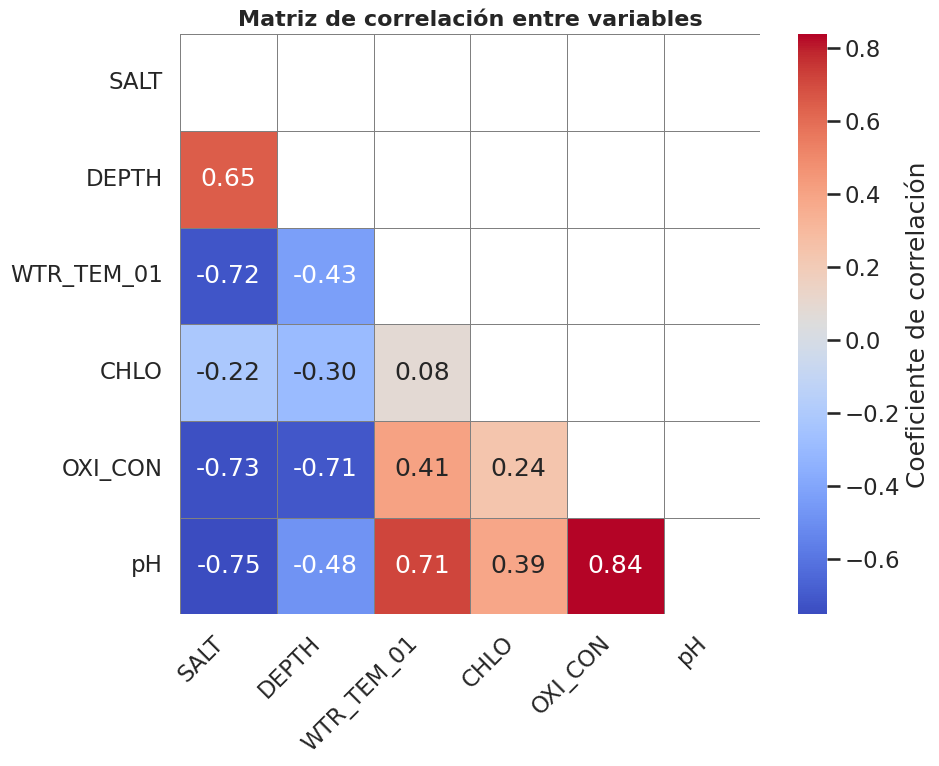

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


variables = ['SALT', 'DEPTH', 'WTR_TEM_01', 'CHLO', 'OXI_CON', 'pH']
datos_numericos = df[variables]

matriz_correlacion = datos_numericos.corr()


mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))


sns.set(style='white', context='talk')

plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacion,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Coeficiente de correlación'},
    square=True,
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Matriz de correlación entre variables', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('matriz_correlacion.png', dpi=300)
plt.show()
